# Case Study - Image Classification using Deep CNN in Keras

--> The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes.  
--> The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks.  
--> There are 6000 images of each class.

The 10 classes represent:  
--> airplanes : 0  
--> cars      : 1  
--> birds     : 2  
--> cats      : 3  
--> deer      : 4  
--> dogs      : 5  
--> frogs     : 6  
--> horses    : 7  
--> ships     : 8  
--> trucks    : 9


# import all necessary modules and load the data

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [28]:
# set the batch size , numbers of epochs
batch_size = 32
num_classes = 10
epochs = 10
num_prediction = 20


In [29]:
#the data , split b/w train and test sets
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()

In [30]:
#print the shape of dataset.
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train sample')
print(X_test.shape[0],'test sample')

X_train shape: (50000, 32, 32, 3)
50000 train sample
10000 test sample


In [31]:
#print the shape of dataset.
print('Y_train shape:', Y_train.shape)
print(Y_train.shape[0], 'Y_train sample')
print(Y_test.shape[0],'Y_test sample')

Y_train shape: (50000, 1)
50000 Y_train sample
10000 Y_test sample


# --> The label of image at index = 0 is 6: 'Frog'

In [32]:
label_dict = {0:'airplane', 1:'automobile', 3:'bird', 4:'deer', 5:'frog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

# Explore the Data
--> Understanding a dateset is part of making prediction on the data. 

--> it answers some of questions like in a give data.. 

Label 
 Label Id : 6 
 name: frog


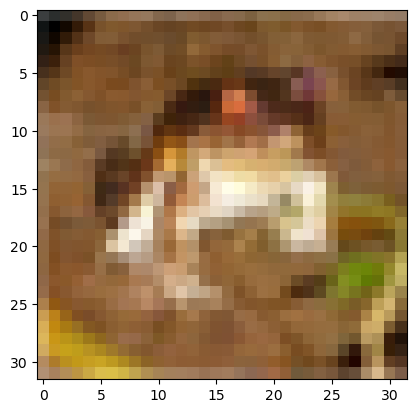

In [33]:
i = 0
image = X_train[i]
label = Y_train[i][0]
print(f'Label \n Label Id : {label} \n name: {label_dict[label]}')
plt.imshow(image);

# Add-on:
Without checking, what is the shape of the image?

How to rewrite the print statement using an f-string?

The above image is of a frog.

The Label ID is 6.

As we can see from the x-axis and y-axis of the image, it shows that there are 32 pixels in each direction.

As the image quality is not good, the edges are not so clear. But still, we can visualize that there are edges.

In [34]:
Y_train.shape

(50000, 1)

In [35]:
# converts labels to one hot vectors

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
Y_train = enc.fit_transform(Y_train)
Y_test = enc.fit_transform(Y_test)

In [36]:
print(Y_train.shape)
print(Y_test.shape)

(50000, 10)
(10000, 10)


In [40]:
Y_train[2]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

# Please Note
There are many tools to one-hot encode and they differ in syntax, but the keras one is probably best implementd. 

--> keras.utils.to_categorical

--> sklearn.preprocessing.OneHotEncoder

-->pandas get_dummies


In [45]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# y= [[0],[1],[2], [3]]
y = [0,1,2,3]
pd.get_dummies(y)

,0,1,2,3
0,True,False,False,False
1,False,True,False,False
2,False,False,True,False
3,False,False,False,True


# Create the Model

Convolutional input layer: 32 feature maps, size 5×5, activation = ReLU

Batch Normalization Layer

Convolutional layer: 32 feature maps, size 5×5, activation = ReLU

Batch Normalization Layer

Max Pooling Layer: size 2×2

Dropout Layer: 25%

-----------------------------------------------
Convolutional layer: 64 feature maps, size 3×3, activation = ReLU

Batch Normalization Layer

Dropout Layer: 25%

Convolutional layer: 64 feature maps, size 3×3, activation = ReLU

Batch Normalization Layer

Max Pooling Layer: size 2×2

Dropout Layer: 25%

---------------------------------------------------

GlobalMaxPooling2D Layer

Fully Connected Layer: 256 units, activation = ReLU

Dropout Layer: 50%

Output Layer: 10 units, activation = Softmax

In [46]:
X_train.shape[1:]

(32, 32, 3)

In [49]:
# set the CNN model

batch_size = None
model = models.Sequential()
model.add(layers.Conv2D(32, (5,5), padding= 'same', activation='relu', input_shape = X_train.shape[1:]))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (5, 5), padding= 'same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))

#softmax
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 4, 4, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 196,810 (768.79 KB)

 Trainable params: 196,362 (767.04 KB)

 Non-trainable params: 448 (1.75 KB)

# Neural Network Layer Descriptions (Keras)
1️⃣ Conv2D
Keras Conv2D is a 2D convolution layer.

It creates a convolution kernel that is convolved with the layer’s input to produce a tensor of outputs.

2️⃣ Activation('relu')
'relu' stands for Rectified Linear Unit.

It is the most widely used activation function, especially in hidden layers.

ReLU is computationally efficient—simpler math than tanh or sigmoid.

It activates only a few neurons at a time, making the network sparse, which improves efficiency.

3️⃣ MaxPooling2D
The goal of MaxPooling is to downsample the input representation.

This helps reduce overfitting by abstracting the representation.

It also reduces computational cost by lowering the number of parameters.

4️⃣ Dropout
Dropout is used to prevent overfitting in neural networks.

During training, a random subset of neurons is deactivated (typically 50%).

This improves generalization.

While often used in fully connected layers, it can also be applied after pooling layers to simulate image noise augmentation.

5️⃣ Dense Layer
The Dense layer implements the operation: output = activation(dot(input, kernel) + bias) where:

activation is the element-wise activation function passed as the activation argument

kernel is a weights matrix created by the layer

bias is a bias vector created by the layer (only applicable if use_bias=True)

🧠 Softmax Function
The softmax function is also a type of sigmoid function, but it’s especially useful for classification problems.

It is usually used when handling multiple classes.

The softmax function:

Squeezes the outputs for each class between 0 and 1

Divides each output by the sum of all outputs, so the total adds up to 1 (i.e., a probability distribution)

# ➕ Add-on:
How to handle multilabel classification?

When training the network, what you want is to minimize the cost by applying an algorithm of your choice. It could be SGD, AdamOptimizer, AdagradOptimizer, or something else. You have to study how each algorithm works to choose what to use, but AdamOptimizer works fine for most cases in general

In [51]:
#initiate Adam optimizer

opt = optimizers.Adam(learning_rate=0.001, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-08)

In [53]:
#lets train the model using RMSprop
model.compile(loss = 'categorical_crossentropy', 
             optimizer = opt,
              metrics=['accuracy']
             )

# Add-on
Stack Overflow: What loss function to use for multi-label classification?

The pixel values are in the range of 0 to 255 for each of the red, green, and blue channels.

It is good practice to work with normalized data. Because the input values are well understood, we can easily normalize to the range 0 to 1 by dividing each value by the maximum observation, which is 255.

Note: the data is loaded as integers, so we must cast it to floating point values in order to perform the division.

In [54]:
X_train = X_train.astype('float32')  #Conversion to float type from integer type
X_test = X_test.astype("float32")
X_train/=255.0 #Division by 255
X_test/=255.0

In [56]:
# Adding Early stopping callback to the fit function is going to stop the training,
# if the val_loss is not going to change even '0.001' for more than 10 continuous epochs
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

# Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value.
# Hence saving the best weights occurred during training

model_checkpoint = ModelCheckpoint(
    'cifar_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.weights.h5',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    save_weights_only=True
)
